# Случайный лес

Случайный лес (random forest) — это множество решающих деревьев. В задаче регрессии их ответы усредняются, в задаче классификации принимается решение голосованием по большинству. Все деревья строятся независимо по следующей схеме:

- Выбирается подвыборка обучающей выборки размера samplesize (м.б. с возвращением) – по ней строится дерево (для каждого дерева — своя подвыборка).
- Для построения каждого расщепления в дереве просматриваем max_features случайных признаков (для каждого нового расщепления — свои случайные признаки).
- Выбираем наилучшие признак и расщепление по нему (по заранее заданному критерию). Дерево строится, как правило, до исчерпания выборки (пока в листьях не останутся представители только одного класса), но в современных реализациях есть параметры, которые ограничивают высоту дерева, число объектов в листьях и число объектов в подвыборке, при котором проводится расщепление.

Дананя построения соответствует главному принципу ансамблирования (построению алгоритма машинного обучения на базе нескольких, в данном случае решающих деревьев): базовые алгоритмы должны быть хорошими и разнообразными (поэтому каждое дерево строится на своей обучающей выборке и при выборе расщеплений есть элемент случайности).

Число деревьев — n_estimators
Чем больше деревьев, тем лучше качество, но время настройки и работы случайного леса также пропорционально увеличиваются.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('34_titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df = df.drop(['Cabin', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1) 

In [6]:
df = df[~df['Age'].isnull()]

In [7]:
df.shape

(714, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        714 non-null    int64  
 5   Parch        714 non-null    int64  
 6   Fare         714 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


In [9]:
y = df['Survived'] # это и есть наш target 
df = df.drop('Survived', axis=1) #удаляем ответы из датафрейма

In [10]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.metrics import accuracy_score, f1_score #до этого момента мы полностью повторяем практику №1 из темы 3.4

In [14]:
from sklearn.ensemble import RandomForestClassifier #импортируем модель случайного леса
model = RandomForestClassifier()                    # инициализируем модель
model.fit(X_train, y_train)                         # обучаем модель
predict = model.predict(X_test)                     # делаем предсказание

print('precision', precision_score(y_test, predict)) #рассчитаем метрики
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.7066666666666667
recall 0.5353535353535354
accuracy 0.711864406779661
f1 0.6091954022988506


In [15]:
# В моделях можно менять какие-то параметры и тем самым улучшать решение
model = RandomForestClassifier(n_estimators=1000) #например увеличим количество деревье в случайном лесе.
model.fit(X_train, y_train)
predict = model.predict(X_test)

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.6923076923076923
recall 0.5454545454545454
accuracy 0.7076271186440678
f1 0.6101694915254238


In [16]:
# Еще модель случайного леса умеет рассчитывать вероятность
predict_proba = model.predict_proba(X_test)

In [17]:
predict_proba # в первом столбце вероятность нуля, а во втором - вероятность единицы.

array([[0.541, 0.459],
       [0.032, 0.968],
       [0.527, 0.473],
       [0.27 , 0.73 ],
       [0.942, 0.058],
       [0.217, 0.783],
       [0.741, 0.259],
       [0.555, 0.445],
       [0.699, 0.301],
       [0.902, 0.098],
       [0.505, 0.495],
       [0.698, 0.302],
       [0.197, 0.803],
       [0.929, 0.071],
       [0.155, 0.845],
       [0.476, 0.524],
       [0.707, 0.293],
       [0.308, 0.692],
       [0.545, 0.455],
       [0.44 , 0.56 ],
       [0.842, 0.158],
       [0.649, 0.351],
       [0.149, 0.851],
       [0.135, 0.865],
       [0.811, 0.189],
       [0.423, 0.577],
       [0.4  , 0.6  ],
       [0.629, 0.371],
       [0.328, 0.672],
       [0.919, 0.081],
       [0.878, 0.122],
       [0.55 , 0.45 ],
       [0.291, 0.709],
       [0.96 , 0.04 ],
       [0.878, 0.122],
       [0.929, 0.071],
       [0.655, 0.345],
       [0.736, 0.264],
       [0.935, 0.065],
       [0.756, 0.244],
       [0.389, 0.611],
       [0.909, 0.091],
       [0.127, 0.873],
       [0.7

In [18]:
# здесь мы берем только вероятность единицы, то есть вероятность спасения
# по синтаксису здесь мы выводим только первый столбец, а не нулевой
predict_proba[:,1]

array([0.459, 0.968, 0.473, 0.73 , 0.058, 0.783, 0.259, 0.445, 0.301,
       0.098, 0.495, 0.302, 0.803, 0.071, 0.845, 0.524, 0.293, 0.692,
       0.455, 0.56 , 0.158, 0.351, 0.851, 0.865, 0.189, 0.577, 0.6  ,
       0.371, 0.672, 0.081, 0.122, 0.45 , 0.709, 0.04 , 0.122, 0.071,
       0.345, 0.264, 0.065, 0.244, 0.611, 0.091, 0.873, 0.276, 0.759,
       0.158, 0.448, 0.264, 0.293, 0.442, 0.671, 0.227, 0.767, 0.256,
       0.157, 0.184, 0.608, 0.36 , 0.062, 0.28 , 0.235, 0.139, 0.273,
       0.243, 0.139, 0.591, 0.778, 0.725, 0.057, 0.253, 0.153, 0.522,
       0.326, 0.092, 0.126, 0.123, 0.139, 0.12 , 0.027, 0.859, 0.087,
       0.782, 0.176, 0.37 , 0.017, 0.06 , 0.099, 0.172, 0.162, 0.263,
       0.249, 0.878, 0.495, 0.198, 0.389, 0.335, 0.686, 0.878, 0.71 ,
       0.218, 0.676, 0.405, 0.113, 0.394, 0.82 , 0.405, 0.072, 0.831,
       0.583, 0.225, 0.685, 0.132, 0.361, 0.258, 0.246, 0.55 , 0.418,
       0.664, 0.31 , 0.02 , 0.524, 0.141, 0.207, 0.267, 0.823, 0.054,
       0.219, 0.437,

In [19]:
# сгенерируем массив, который состоит из сгенерированных случайных значений от 0 до 1, длиной как predict_proba
import random
tmp = [
    random.random()
    for _ in range (len(predict_proba[:1]))
]

(-0.01, 1.01)

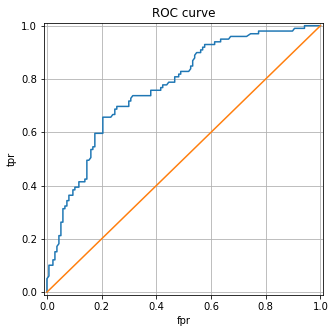

In [20]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

На рисунке выше мы построили ROC кривую и сравнили ее со случайной выборкой, как можно понять случайная выборка всегда дает вероятность равную 0,5, как при подбрасывании монетки.
Чем дальше от нее отстоит ROC кривая тем лучше.

In [21]:
roc_auc_score(y_test, predict_proba[:,1]) #значение метрики ROC AUC 

0.769851802698518

In [22]:
from sklearn.model_selection import cross_val_score #как и в предыдущих темах мы можем запустить кросс-валидацию
rfc = RandomForestClassifier()
cross_val_score(
    rfc,
    df,
    y,
    scoring='roc_auc',
    cv=10
)

array([0.66880513, 0.5733761 , 0.5829992 , 0.69967923, 0.69909688,
       0.75862069, 0.79638752, 0.80788177, 0.80295567, 0.81034483])

## Двайте обработаем данные еще раз и получим лучший результат при обучении модели

In [24]:
df = pd.read_csv('34_titanic_train.csv')

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
df = df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

In [28]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [29]:
# Закодируем пол и порт посадки с помощью OneHotEncoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [30]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [32]:
# Заполним пропуски в данных самым простым подходящим пособом: медианой
df.loc[df['Age'].isnull(), 'Age'] = df['Age'].median()

In [33]:
# Проверяем что все параметры это числа
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [34]:
dtc = RandomForestClassifier(n_estimators=1000)
cross_val_score(
    dtc,
    df.drop('Survived', axis=1),
    df['Survived'],
    scoring='roc_auc',
    cv=10
)

array([0.80051948, 0.86229947, 0.72379679, 0.88903743, 0.92727273,
       0.87807487, 0.85588235, 0.83048128, 0.91283422, 0.87910053])

Теперь мы видим, что значения существенно улучшились по сравнению с предыдущим решением, когда мы удалили много столбцов и строк с пропущенными значениями.

Таким образом, сами данные всегда оказывают существенное влияние на конечное решение.

# Градиентный бустинг XGBoost

XGBoost — алгоритм машинного обучения, основанный на дереве поиска решений и использующий фреймворк градиентного бустинга. В задачах предсказания, которые используют неструктурированные данные (например, изображения или текст), искусственная нейронная сеть превосходит все остальные алгоритмы или фреймворки. Но когда дело доходит до структурированных или табличных данных небольших размеров, в первенстве оказываются алгоритмы, основанные на дереве поиска решений.

Градиентный бустинг — это техника машинного обучения для задач классификации и регрессии, которая строит модель предсказания в форме ансамбля слабых предсказывающих моделей, обычно деревьев решений. Обучение ансамбля проводится последовательно. На каждой итерации вычисляются отклонения предсказаний уже обученного ансамбля на обучающей выборке. Следующая модель, которая будет добавлена в ансамбль будет предсказывать эти отклонения. Таким образом, добавив предсказания нового дерева к предсказаниям обученного ансамбля мы можем уменьшить среднее отклонение модели, котрое является таргетом оптимизационной задачи. Новые деревья добавляются в ансамбль до тех пор, пока ошибка уменьшается, либо пока не выполняется одно из правил "ранней остановки".

### Пример использования с помощью библиотеки xgboost

Загрузка датасета.

In [36]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

Разделение датасета на обучающую/тестовую выборку.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
!pip install xgboost #иногда необходимо установить сам модуль, что и сделано в этой строке.

Импорт XGBoost и создание необходимых объектов.

In [43]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

Задание параметров модели.

In [44]:
param = {
   'max_depth': 3,
   'eta': 0.3, 
   'silent': 1, 
   'objective': 'multi:softprob',
   'num_class': 3}
num_round = 20

Обучение.

In [45]:
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)

[19:15:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Определение качества модели на тестовой выборке.

In [48]:
import numpy as np
best_preds = np.asarray([np.argmax(line) for line in preds])
precision_score(y_test, best_preds, average='macro')

1.0

Как видно по полученному результату данная модель работает идеально.